https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(tr_im,tr_lab),(tt_im,tt_lab) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


reshape the image arrays for ``conv`` layers

In [5]:
tr_im.shape

(60000, 28, 28)

In [6]:
img_rows,img_cols = tr_im.shape[1:]
input_shape = (img_rows,img_cols,1)
tr_im = tr_im.reshape(tr_im.shape[0],img_rows,img_cols,1)
tt_im = tt_im.reshape(tt_im.shape[0],img_rows,img_cols,1)
tr_im.shape

(60000, 28, 28, 1)

'Ankle boot'

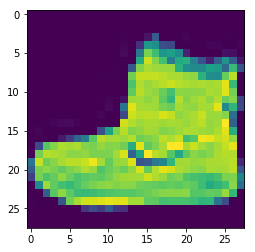

In [7]:
plt.imshow(tr_im[0,:,:,0])
class_names[tr_lab[0]]

Normalize the image range to be between 0 and 1

In [8]:
tr_im.max()

255

In [9]:
tr_im = tr_im / tr_im.max()

In [10]:
tt_im = tt_im / tt_im.max()

convert the labels to binary matrices (one hot) - needed for catagorical cross entropy loss function

In [11]:
tr_lab = keras.utils.to_categorical(tr_lab,len(class_names))
tt_lab = keras.utils.to_categorical(tt_lab,len(class_names))
tr_lab[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation=tf.nn.relu,input_shape=input_shape))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(class_names),activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

Split the training data into 2 sets

In [17]:
vl_im,tr_im = tr_im[:5000],tr_im[5000:]
vl_im.shape,tr_im.shape

((5000, 28, 28, 1), (55000, 28, 28, 1))

In [18]:
vl_lab,tr_lab = tr_lab[:5000],tr_lab[5000:]
vl_lab.shape,tr_lab.shape

((5000, 10), (55000, 10))

In [19]:
model.fit(tr_im,tr_lab,epochs=5,batch_size=256,validation_data=(vl_im,vl_lab))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 119s 2ms/step - loss: 0.5086 - acc: 0.8193 - val_loss: 0.3155 - val_acc: 0.8876
Epoch 2/5
55000/55000 [==============================] - 111s 2ms/step - loss: 0.3157 - acc: 0.8869 - val_loss: 0.2634 - val_acc: 0.9066
Epoch 3/5
55000/55000 [==============================] - 140s 3ms/step - loss: 0.2616 - acc: 0.9050 - val_loss: 0.2296 - val_acc: 0.9124
Epoch 4/5
55000/55000 [==============================] - 108s 2ms/step - loss: 0.2307 - acc: 0.9158 - val_loss: 0.2175 - val_acc: 0.9210
Epoch 5/5
55000/55000 [==============================] - 112s 2ms/step - loss: 0.2056 - acc: 0.9231 - val_loss: 0.2088 - val_acc: 0.9200


In [20]:
tt_loss,tt_acc = model.evaluate(tt_im,tt_lab)
tt_acc

10000/10000 [==============================] - 8s 829us/step


0.9173

In [21]:
predictions = model.predict(tt_im)

In [22]:
p_max = [np.argmax(p) for p in predictions]

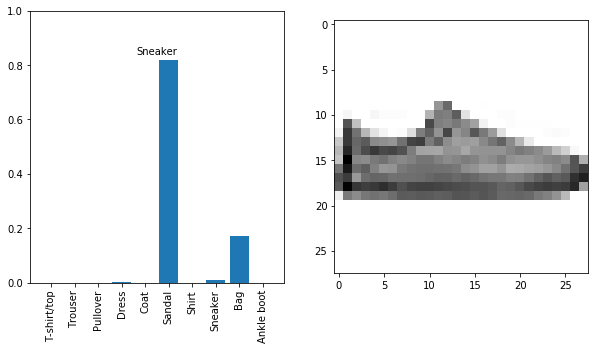

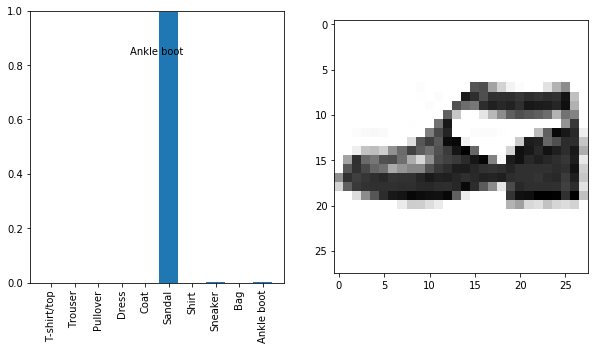

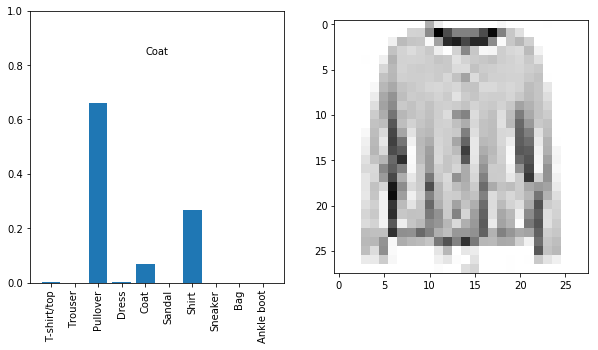

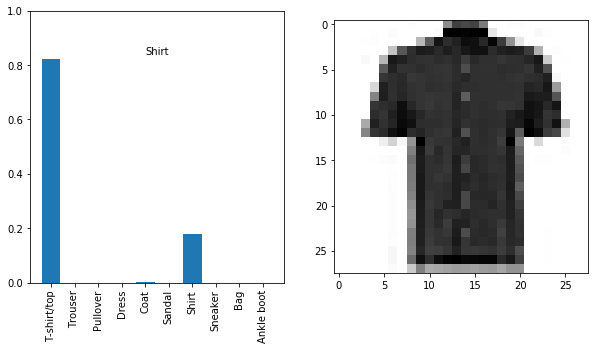

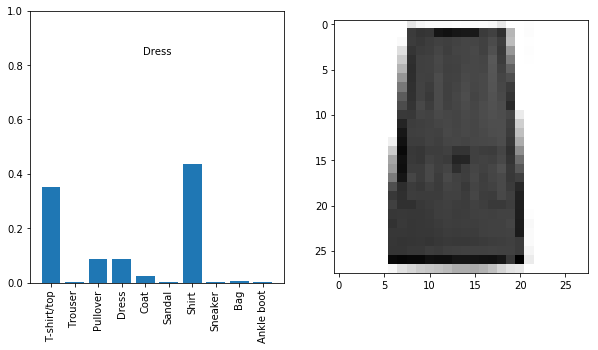

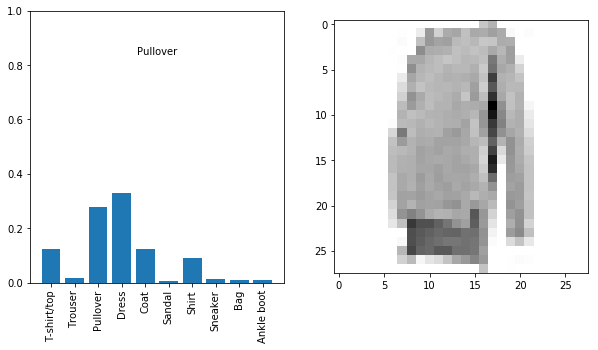

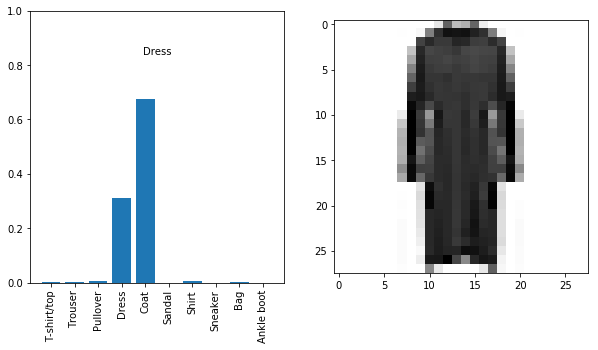

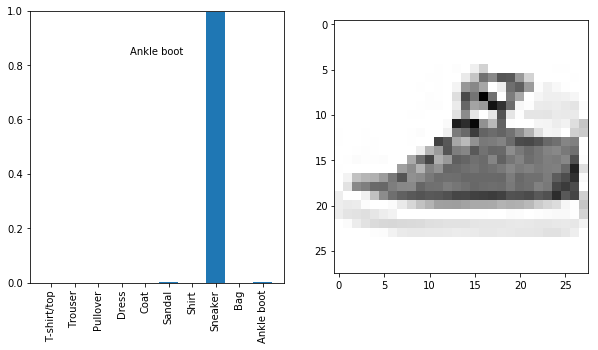

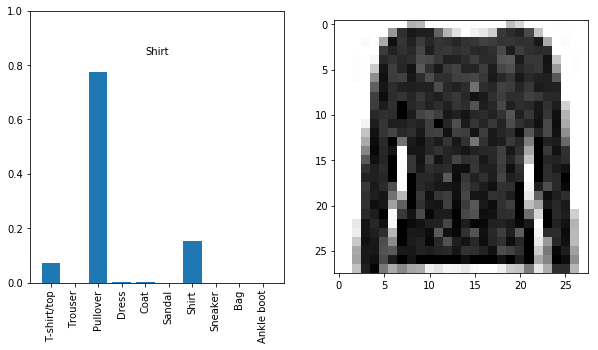

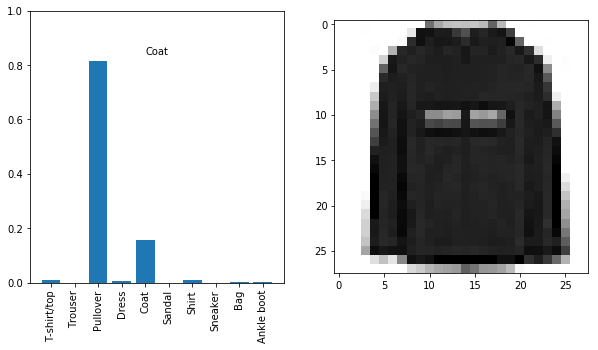

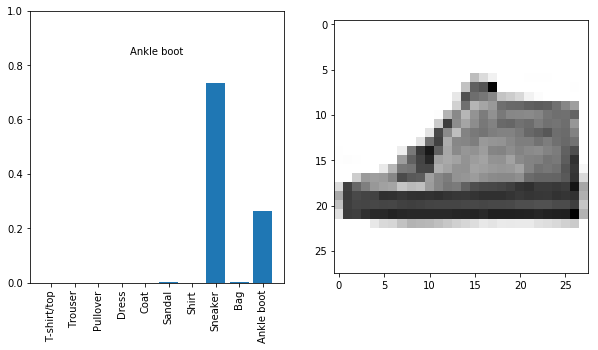

In [30]:
bins = np.arange(len(class_names))
wrong_count = 0
for p,pm,tl,ti in zip(predictions,p_max,tt_lab,tt_im): 
    tl = np.argmax(tl)
    if pm != tl:
        fig = plt.figure(figsize=(10,5))
        ax1,ax2 = plt.subplot(121),plt.subplot(122)
        ax1.bar(bins,p)
        ax1.set_xticks(bins)
        ax1.set_xticklabels(class_names,rotation=90)
        ax1.set_ylim(0,1)
        ax1.text(0.5,0.85,class_names[tl],transform=ax1.transAxes,ha="center",va="center")
        ax2.imshow(ti[:,:,0],cmap=plt.cm.gray_r)
        plt.show()
        wrong_count += 1
        if wrong_count > 10:
            break